In [2]:
%matplotlib inline


# Davis Club


Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al. in the 1930s.
They represent observed attendance at 14 social events by 18 Southern women.
The graph is bipartite (clubs, women).


Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson

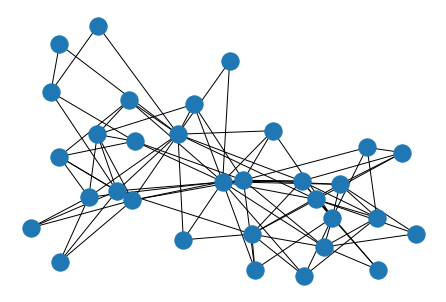

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite

G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w), w))

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w, weight='weight'), w))

#nx.draw(G)
#plt.show()

### Quick graph info

In [5]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 32\nNumber of edges: 89\nAverage degree:   5.5625'

### Nodes
The nodes in this graph are both the women and the events.  There are 32 edges, 18 women and 14 events.

In [6]:
list(G.nodes())

['Evelyn Jefferson',
 'Laura Mandeville',
 'Theresa Anderson',
 'Brenda Rogers',
 'Charlotte McDowd',
 'Frances Anderson',
 'Eleanor Nye',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Verne Sanderson',
 'Myra Liddel',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd',
 'Dorothy Murchison',
 'Olivia Carleton',
 'Flora Price',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14']

### Edges
The edges in this graph consist of the women and the events they attended.  There are 89 edges.

In [7]:
list(G.edges())

[('Evelyn Jefferson', 'E1'),
 ('Evelyn Jefferson', 'E2'),
 ('Evelyn Jefferson', 'E3'),
 ('Evelyn Jefferson', 'E4'),
 ('Evelyn Jefferson', 'E5'),
 ('Evelyn Jefferson', 'E6'),
 ('Evelyn Jefferson', 'E8'),
 ('Evelyn Jefferson', 'E9'),
 ('Laura Mandeville', 'E1'),
 ('Laura Mandeville', 'E2'),
 ('Laura Mandeville', 'E3'),
 ('Laura Mandeville', 'E5'),
 ('Laura Mandeville', 'E6'),
 ('Laura Mandeville', 'E7'),
 ('Laura Mandeville', 'E8'),
 ('Theresa Anderson', 'E2'),
 ('Theresa Anderson', 'E3'),
 ('Theresa Anderson', 'E4'),
 ('Theresa Anderson', 'E5'),
 ('Theresa Anderson', 'E6'),
 ('Theresa Anderson', 'E7'),
 ('Theresa Anderson', 'E8'),
 ('Theresa Anderson', 'E9'),
 ('Brenda Rogers', 'E1'),
 ('Brenda Rogers', 'E3'),
 ('Brenda Rogers', 'E4'),
 ('Brenda Rogers', 'E5'),
 ('Brenda Rogers', 'E6'),
 ('Brenda Rogers', 'E7'),
 ('Brenda Rogers', 'E8'),
 ('Charlotte McDowd', 'E3'),
 ('Charlotte McDowd', 'E4'),
 ('Charlotte McDowd', 'E5'),
 ('Charlotte McDowd', 'E7'),
 ('Frances Anderson', 'E3'),
 ('Fra

### Graph diameter
The graph diameter is 4.  It is a closely connected graph.  There are only 4 edges to traverse between the 2 most distant nodes.

In [9]:
nx.diameter(G)

4

### Graph Visualization

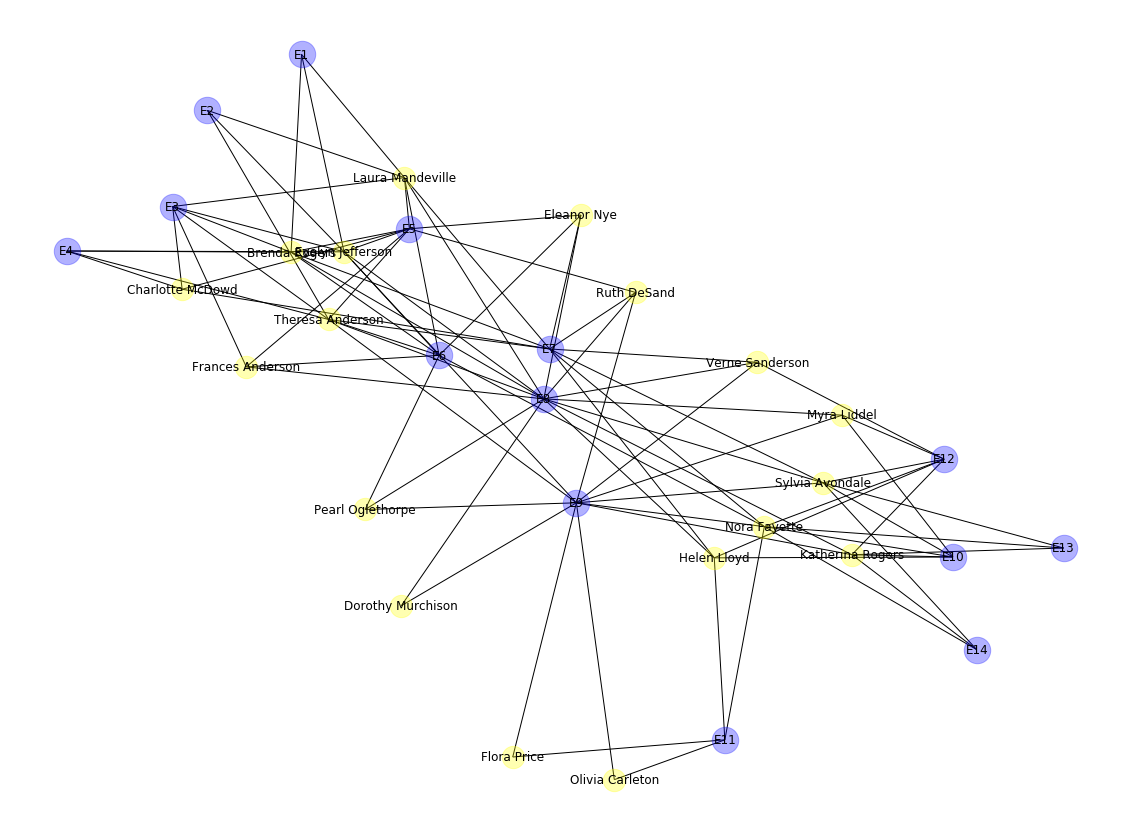

In [21]:
plt.figure(figsize=(20,15))
plt.axis('off')
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist = women, node_color = 'yellow', alpha = 0.3, node_size = 500)
nx.draw_networkx_nodes(G, pos, nodelist = clubs, node_color = 'blue', alpha = 0.3, node_size = 700)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos);

### Women Network

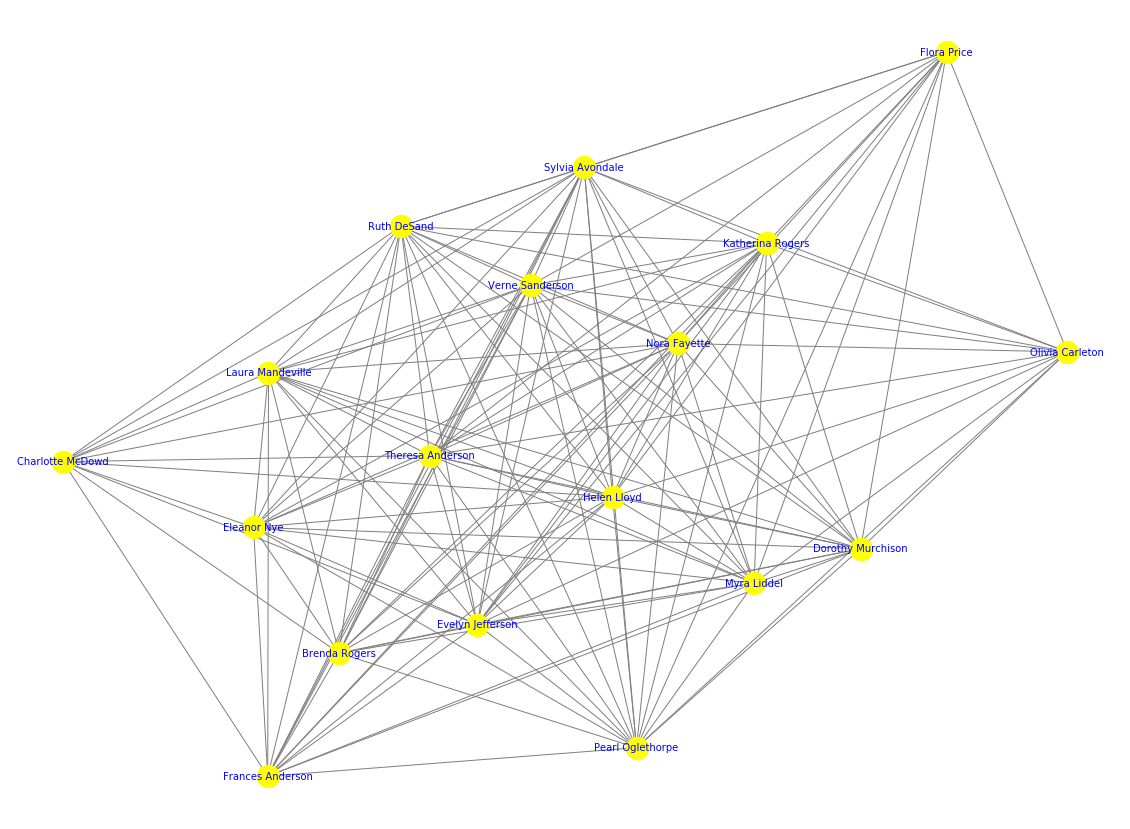

In [30]:
plt.figure(figsize=(20,15))
plt.axis('off')
pos = nx.spring_layout(W)
nx.draw_networkx_nodes(W, pos, node_color='yellow', node_size=500)
nx.draw_networkx_edges(W, pos, edge_color = 'gray')
nx.draw_networkx_labels(W, pos, font_size=10, font_color ='blue')
plt.show()

In [34]:
deg = nx.degree(W)
max_deg = sorted(deg, key=lambda x: x[1], reverse=True)[:5]
max_deg

[('Evelyn Jefferson', 17),
 ('Theresa Anderson', 17),
 ('Ruth DeSand', 17),
 ('Verne Sanderson', 17),
 ('Sylvia Avondale', 17)]

In [32]:
nx.center(W)

['Evelyn Jefferson',
 'Theresa Anderson',
 'Ruth DeSand',
 'Verne Sanderson',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd']

In [33]:
list(W.degree())

[('Evelyn Jefferson', 17),
 ('Laura Mandeville', 15),
 ('Theresa Anderson', 17),
 ('Brenda Rogers', 15),
 ('Charlotte McDowd', 11),
 ('Frances Anderson', 15),
 ('Eleanor Nye', 15),
 ('Pearl Oglethorpe', 16),
 ('Ruth DeSand', 17),
 ('Verne Sanderson', 17),
 ('Myra Liddel', 16),
 ('Katherina Rogers', 16),
 ('Sylvia Avondale', 17),
 ('Nora Fayette', 17),
 ('Helen Lloyd', 17),
 ('Dorothy Murchison', 16),
 ('Olivia Carleton', 12),
 ('Flora Price', 12)]

In [35]:
deg_cent = nx.degree_centrality(W)
max_cent = sorted(deg_cent.items(), key=lambda x: x[1], reverse=True)[:5]
max_cent

[('Evelyn Jefferson', 1.0),
 ('Theresa Anderson', 1.0),
 ('Ruth DeSand', 1.0),
 ('Verne Sanderson', 1.0),
 ('Sylvia Avondale', 1.0)]

In [45]:
from pandas import DataFrame
import plotly as py
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
df_women = DataFrame(list(nx.degree(W)),columns = ['Woman','Degrees']) 
df_women

fig = go.Figure()
fig.add_trace(go.Bar(
    x = df_women['Woman'],
    y = df_women['Degrees']))

fig.update_layout(go.Layout(
    title='Number of Degrees for Each Woman',
    xaxis=dict(
        title='', tickangle = 90
    ),
    yaxis=dict(
        title='Degrees'
    )
))
fig.show()